In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = '/Users/pauloarantes/Drive/galvanize/_capstone/Datasets - Capstone/Jus Brasil/lawyer_interactions20160616v2.csv'

In [3]:
cols = ['lawyer_id',
'is_hot_case',
'hot_lead_spent',
'text_message_sent',
'phone_visualized',
'legal_case_id',
'title',
'expertise',
'location',
'created_at',
'referrer',
'hiring_intent',
'can_afford',
'text']

In [4]:
df = pd.read_csv(path, sep=';', header=None, usecols=range(14), low_memory=False)
df.columns = cols

In [8]:
df.head()

,lawyer_id,is_hot_case,hot_lead_spent,text_message_sent,phone_visualized,legal_case_id,title,expertise,location,created_at,referrer,hiring_intent,can_afford,text
0,3744247,1,1,1,0,783337,Dúvida de Rosângela em Direito de Família,26413205,646425,2016-06-17 01:16:12,\N,1,1,Separação e pensão alimentícia
1,6088646,1,0,0,0,783337,Dúvida de Rosângela em Direito de Família,26413205,646425,2016-06-17 01:16:12,\N,1,1,Separação e pensão alimentícia
2,6358113,1,0,0,0,783337,Dúvida de Rosângela em Direito de Família,26413205,646425,2016-06-17 01:16:12,\N,1,1,Separação e pensão alimentícia
3,6427203,1,1,1,0,783337,Dúvida de Rosângela em Direito de Família,26413205,646425,2016-06-17 01:16:12,\N,1,1,Separação e pensão alimentícia
4,3702793,0,0,0,0,783336,Dúvida de glaucia santos em Direito Imobiliário,26413223,693822,2016-06-17 01:16:08,http://www.jusbrasil.com.br/busca?q=POSSIBILID...,0,0,Boa noite.Fiz um contrato de troca/permuta de ...


In [ ]:
df.info()

In [ ]:
# coms = pd.read_csv(path, header=None, sep=';', usecols=[13], quoting=2, encoding='utf-8')
# coms[[13]].values[693][0].encode('cp860')

In [15]:
matrix_cols = []
score_cols = ['is_hot_case', 'hot_lead_spent', 'text_message_sent', 'phone_visualized', 'hiring_intent', 'can_afford']

In [ ]:
df[(df.hot_lead_spent == 1)]['lawyer_id'].count()

In [ ]:
df[(df.hot_lead_spent == 1)][(df.text_message_sent == 1)]['lawyer_id'].count()

In [ ]:
df[(df.hot_lead_spent == 1)][(df.phone_visualized != 1)]['lawyer_id'].count()

In [ ]:
df[(df.hot_lead_spent == 1)][(df.phone_visualized == 1)]['text_message_sent'].sum()

In [ ]:
If 'hot_lead_spent' (3510):
    'text_message_sent' (2471)
    'phone_visualized' (1609)
    both (570)

In [ ]:
df[(df.text_message_sent == 1)]['text_message_sent'].count()

In [ ]:
df[(df.phone_visualized == 1)]['phone_visualized'].count()

In [ ]:
df[(df.phone_visualized != 1)]['text_message_sent'].sum()

In [ ]:
df[(df.text_message_sent == 1)]['phone_visualized'].sum()

In [ ]:
df[df.is_hot_case == 1]['hot_lead_spent'].sum()

In [ ]:
df[df.is_hot_case == 1]['is_hot_case'].sum()

In [ ]:
df[df.hot_lead_spent == 1]['hot_lead_spent'].sum()

In [ ]:
df[df.hot_lead_spent == 1]

In [ ]:
df[df.can_afford == 1]['hiring_intent'].sum()

In [6]:
df[df.referrer != ''].count()

lawyer_id            4264
is_hot_case          4264
hot_lead_spent       4264
text_message_sent    4264
phone_visualized     4264
legal_case_id        4264
title                4264
expertise            4264
location             4264
created_at           4264
referrer             4264
hiring_intent        4264
can_afford           4264
text                 4264
dtype: int64

In [7]:
df.referrer.value_counts()

https://www.google.com.br/                                                                                                                                                                         6282
\N                                                                                                                                                                                                 4264
http://advogadoonline.jusbrasil.com.br/artigos/195608727/advogado-online                                                                                                                           3127
http://jucineiaprussak.jusbrasil.com.br/noticias/299931265/mudancas-na-lei-a-pensao-alimenticia-ficara-mais-rigorosa-a-partir-de-marco                                                             1034
http://www.jusbrasil.com.br/                                                                                                                                                                        865


In [10]:
df[df.is_hot_case == 1]['hiring_intent'].sum()

8299

In [11]:
df[df.is_hot_case != 1]['hiring_intent'].sum()

10124

In [12]:
df.expertise.unique()

array([26413205, 26413223, 26413213,   355654, 26413200,   292125,
       26413229, 26413232, 26413192,   735233, 26413052, 26413240,
       26413224, 26413220, 26413216, 26413387, 26413218, 26413196])

In [18]:
scores = df[score_cols]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12c61bc50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12e679950>]], dtype=object)

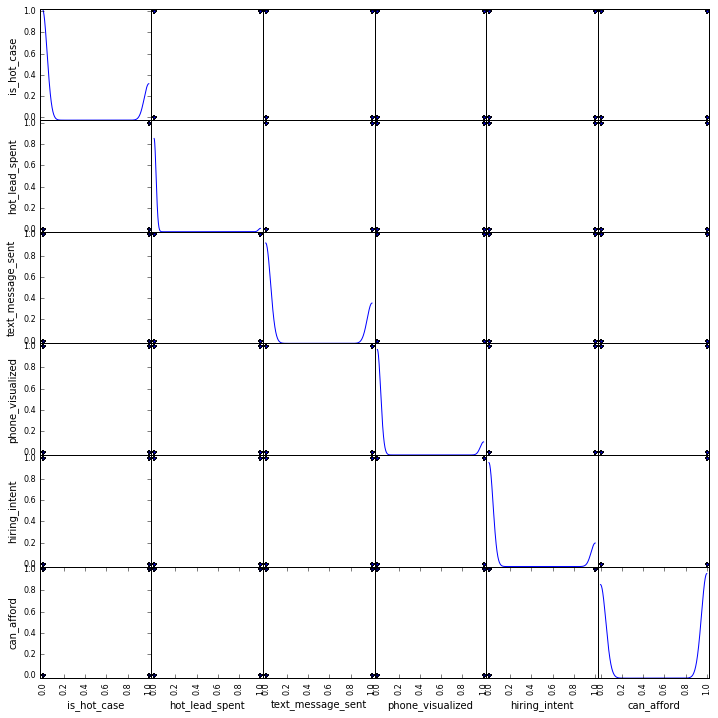

In [21]:
pd.scatter_matrix(scores, diagonal='kde', alpha=0.3, figsize=(12, 12))

In [28]:
df[df.is_hot_case == 1]['phone_visualized'].count()

24679

In [26]:
df[df.hot_lead_spent == 1]['hiring_intent'].count()

3510

In [30]:
df.hot_lead_spent.value_counts()

0    96288
1     3510
Name: hot_lead_spent, dtype: int64

In [31]:
df.is_hot_case.value_counts()

0    75119
1    24679
Name: is_hot_case, dtype: int64

In [36]:
for col in score_cols:
#     print col
    print df[col].value_counts()
    print '\n'

0    75119
1    24679
Name: is_hot_case, dtype: int64


0    96288
1     3510
Name: hot_lead_spent, dtype: int64


0    71214
1    28584
Name: text_message_sent, dtype: int64


0    88809
1    10989
Name: phone_visualized, dtype: int64


0    81375
1    18423
Name: hiring_intent, dtype: int64


1    52673
0    47125
Name: can_afford, dtype: int64




In [50]:
# If they can't afford, what percentage of lawyers send messages?
df[df.can_afford == 0]['text_message_sent'].sum() / float(df[df.can_afford == 0]['text_message_sent'].count())

0.2783448275862069

In [51]:
# If they can afford, what percentage of lawyers send messages?
df[df.can_afford == 1]['text_message_sent'].sum() / float(df[df.can_afford == 1]['text_message_sent'].count())

0.2936419038216923

In [48]:
# If they have no intention of hiring, what percentage of lawyers send messages?
df[df.hiring_intent == 0]['text_message_sent'].sum() / float(df[df.hiring_intent == 0]['text_message_sent'].count())

0.28188018433179723

In [49]:
# If they have intention of hiring, what percentage of lawyers send messages?
df[df.hiring_intent == 1]['text_message_sent'].sum() / float(df[df.hiring_intent == 1]['text_message_sent'].count())

0.30646474515551214

In [52]:
scores.columns

Index([u'is_hot_case', u'hot_lead_spent', u'text_message_sent',
       u'phone_visualized', u'hiring_intent', u'can_afford'],
      dtype='object')

In [56]:
scores[ (scores["text_message_sent"] == 1) & (scores["phone_visualized"] == 1)]

,is_hot_case,hot_lead_spent,text_message_sent,phone_visualized,hiring_intent,can_afford
56,0,0,1,1,0,0
90,0,0,1,1,0,0
121,0,0,1,1,0,0
141,0,0,1,1,0,0
211,0,0,1,1,0,1
240,0,0,1,1,0,0
342,0,0,1,1,0,1
345,0,0,1,1,0,0
362,0,0,1,1,1,1
366,0,0,1,1,1,1


In [114]:
scores['rating'] = 1
scores['rating'][scores['phone_visualized'] == 1] = 2
scores['rating'][scores['text_message_sent'] == 1] = 3
scores['rating'][(scores['text_message_sent'] == 1) & (scores['phone_visualized'] == 1)] = 4
scores['rating'][scores['hot_lead_spent'] == 1] = 5

/Users/pauloarantes/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [121]:
scores.head()

,hot_lead_spent,text_message_sent,phone_visualized,rating
0,1,1,0,5
1,0,0,0,1
2,0,0,0,1
3,1,1,0,5
4,0,0,0,1


In [118]:
scores.drop(['txt_phone', 'score'], axis=1, inplace=True)

/Users/pauloarantes/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [120]:
scores.drop(['is_hot_case', 'can_afford', 'hiring_intent'], axis=1, inplace=True)

/Users/pauloarantes/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [ ]:
ratings = 

In [122]:
df.columns

Index([u'lawyer_id', u'is_hot_case', u'hot_lead_spent', u'text_message_sent',
       u'phone_visualized', u'legal_case_id', u'title', u'expertise',
       u'location', u'created_at', u'referrer', u'hiring_intent',
       u'can_afford', u'text'],
      dtype='object')

In [127]:
ratings = pd.concat([df[['lawyer_id', 'legal_case_id']], scores['rating']], axis=1)

In [129]:
ratings.head(10)

,lawyer_id,legal_case_id,rating
0,3744247,783337,5
1,6088646,783337,1
2,6358113,783337,1
3,6427203,783337,5
4,3702793,783336,1
5,3757156,783336,1
6,3802228,783335,3
7,3820267,783335,1
8,4037024,783335,1
9,5360347,783335,2
